### Szükséges modulok importálása
##### Az adattábla forrása : Kaggle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Adattábla beolvasása

In [3]:
df = pd.read_csv("nyc-rolling-sales.csv")

In [4]:
# Adattisztítás
df.drop(columns='EASE-MENT', axis=1, inplace=True)
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.drop(columns='APARTMENT NUMBER', axis=1, inplace=True)

In [5]:
# Adattisztítás
df['SALE PRICE'] = df['SALE PRICE'].str.strip().replace('-', np.nan)
df['SALE PRICE'] = df['SALE PRICE'].fillna(0)
df['SALE PRICE'] = df['SALE PRICE'].astype(float)

In [6]:
avg_price = round((df['SALE PRICE'].mean()), 2) # Átlagos eladási ár

In [7]:
avg_price

1056622.99

In [8]:
# Csoportosítás ingatlan típus alapján
property_types_counts = df.groupby('BUILDING CLASS CATEGORY').size()
property_types_counts = property_types_counts.sort_values(ascending=False)
min_count = 5000
other_count = property_types_counts[property_types_counts < min_count].sum()
property_types_counts = property_types_counts[property_types_counts >= min_count]
new_index = property_types_counts.index.str.slice(2)
cleaned_series = pd.Series(property_types_counts.values, index=new_index)
cleaned_series['Others'] = other_count

### Néhány ingatlan típus eloszlása

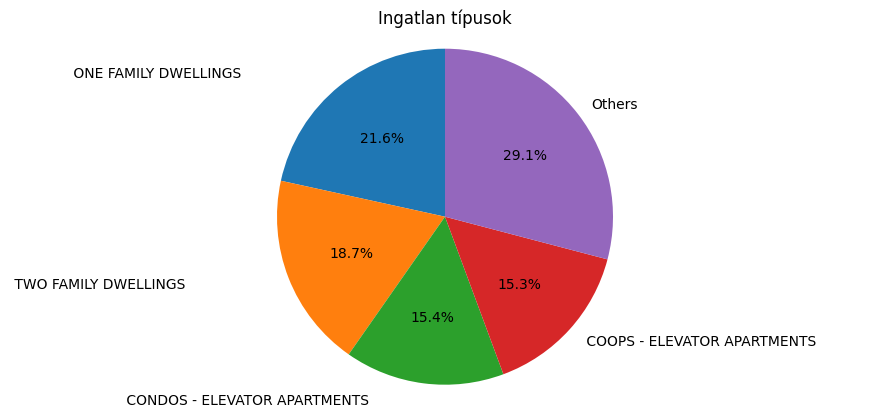

In [9]:
# kördiagramm megjelenítése
cleaned_series.plot(kind='pie', autopct='%1.1f%%', startangle=90)


plt.axis('equal')
plt.title('Ingatlan típusok')
plt.ylabel('')
plt.show()

In [10]:
# Átlag és maximum árak az 1, 2, 3 családos épületeknél
condition_1 = df['BUILDING CLASS CATEGORY'].str.strip() == '01 ONE FAMILY DWELLINGS'
condition_2 = df['BUILDING CLASS CATEGORY'].str.strip() == '02 TWO FAMILY DWELLINGS'
condition_3 = df['BUILDING CLASS CATEGORY'].str.strip() == '03 THREE FAMILY DWELLINGS'

mean_1 = df[condition_1].groupby('BOROUGH')['SALE PRICE'].mean().reset_index()
max_group_1 = df[condition_1].groupby('BOROUGH')['SALE PRICE'].max().reset_index()
max_group_1 = max_group_1.rename(columns={'SALE PRICE': 'MAX SP'}).sort_values(by='BOROUGH')

mean_2 = df[condition_2].groupby('BOROUGH')['SALE PRICE'].mean().reset_index()
max_group_2 = df[condition_2].groupby('BOROUGH')['SALE PRICE'].max().reset_index()
max_group_2 = max_group_2.rename(columns={'SALE PRICE': 'MAX SP'}).sort_values(by='BOROUGH')

mean_3 = df[condition_3].groupby('BOROUGH')['SALE PRICE'].mean().reset_index()
max_group_3 = df[condition_3].groupby('BOROUGH')['SALE PRICE'].max().reset_index()
max_group_3 = max_group_3.rename(columns={'SALE PRICE': 'MAX SP'}).sort_values(by='BOROUGH')




In [11]:
# Adatok átadása numpy tömbbe
x_labels = np.array(["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"])
y1 = np.array(max_group_1['MAX SP']) / 1000000
y2 = np.array(max_group_2['MAX SP']) / 1000000
y3 = np.array(max_group_3['MAX SP']) / 1000000

m1 = np.array(mean_1['SALE PRICE']) / 1000000
m2 = np.array(mean_2['SALE PRICE']) / 1000000
m3 = np.array(mean_3['SALE PRICE']) / 1000000

### 1, 2, 3 családos legmagasabb lakás árak New York különböző körzeteiben

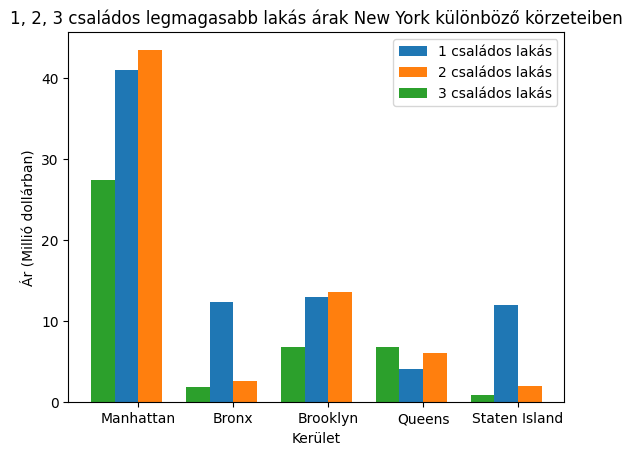

In [12]:
# Oszlopdiagramm megjelenítése
fig, ax = plt.subplots()

width = 0.25

x_pos1 = np.arange(len(x_labels))
x_pos2 = x_pos1 + width
x_pos3 = x_pos1 - width

ax.bar(x_pos1, y1, width, label="1 családos lakás")
ax.bar(x_pos2, y2, width, label="2 családos lakás")
ax.bar(x_pos3, y3, width, label="3 családos lakás")


ax.set_xlabel("Kerület")
ax.set_ylabel("Ár (Millió dollárban)")
ax.set_title("1, 2, 3 családos legmagasabb lakás árak New York különböző körzeteiben")


ax.set_xticks(x_pos1 + width / 2)
ax.set_xticklabels(x_labels)


ax.legend()


plt.show()


### 1, 2, 3 családos átlag lakás árak New York különböző körzeteiben

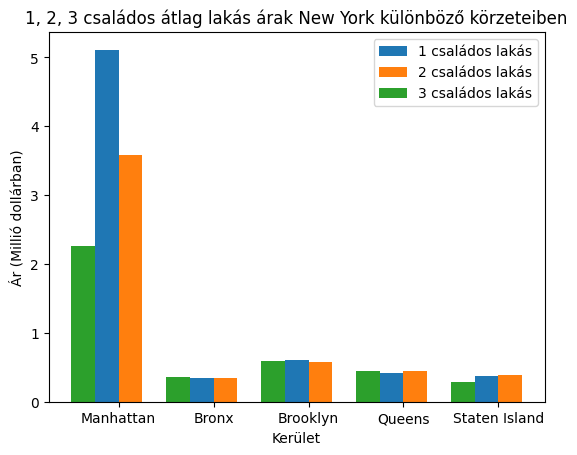

In [13]:
# Oszlopdiagramm megjelenítése
fig, ax = plt.subplots()

width = 0.25

x_pos1 = np.arange(len(x_labels))
x_pos2 = x_pos1 + width
x_pos3 = x_pos1 - width

ax.bar(x_pos1, m1, width, label="1 családos lakás")
ax.bar(x_pos2, m2, width, label="2 családos lakás")
ax.bar(x_pos3, m3, width, label="3 családos lakás")


ax.set_xlabel("Kerület")
ax.set_ylabel("Ár (Millió dollárban)")
ax.set_title("1, 2, 3 családos átlag lakás árak New York különböző körzeteiben")


ax.set_xticks(x_pos1 + width / 2)
ax.set_xticklabels(x_labels)


ax.legend()


plt.show()